## Now You Code In Class: Tricks of The DataViz Masters

We will try something a bit different in the Activity - A series of Data Visualization coding challenges!

For this Now You Code, you will need:

    - OpenWeatherMap API key https://openweathermap.org/api (From previous HW)
    - Plotly Credentials  https://chart-studio.plotly.com/ (From Lab) 
    
    


In [1]:
import requests
import geocoder
import matplotlib
import matplotlib.pyplot as plt
import chart_studio as plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import folium
from IPython.display import display

In [27]:
# SET YOUR KEYS AND CREDENTIALS
plotly.tools.set_credentials_file(username='aepellec', api_key='vhyNMydFoPtOhmQwaJ4s')
weather_key = 'f5680b46e6a81a5266b827a85ad0f607' # sign up for your own key at https://openweathermap.org/ 

In [28]:
def getWeather(weather_key,location):
    g = geocoder.osm(location)
    query_string = { 'lat' : g.latlng[0], 'lon': g.latlng[1], 'appid' : weather_key, 'units' : 'imperial'}
    url='https://api.openweathermap.org/data/2.5/onecall' 
    response = requests.get(url, params=query_string)
    response.raise_for_status()
    #print (response.url)
    weather = response.json()
    return weather


# Exam Scores Data Set

Load the data

In [9]:
exam_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/exam-scores/exam-scores.csv')
display(exam_df.sample(5))

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
55,M02,C,45,N,Y,Y,25,83.30%,B
28,M01,D,60,?,?,?,26,86.70%,B+
50,M02,C,35,N,Y,N,23,76.70%,B-
7,M01,B,15,Y,Y,Y,26,86.70%,B+
64,M02,D,60,N,N,Y,24,80.00%,B


## Challenge 1

Use `matplotlib` to plot a pie chart of 'Studied In Groups`

HINTS: 
 - You must get `value_counts` of the series, then make a `DataFrame` from it and plot.
 - Plotting help:  `help(df.plot.pie)` where `df` is the dataframe you made.


<Axes: ylabel='count'>

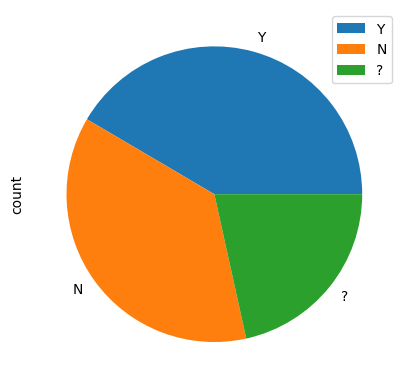

In [15]:
sig_df = pd.DataFrame(exam_df["Studied_In_Groups"].value_counts())
sig_df.plot.pie(y='count')

## Challenge 2

Use `plotly` express to plot the same pie chart of 'Studied In Groups`

HINT: You can use the dataframe from the previous cell. `help(px.pie)` for assistance


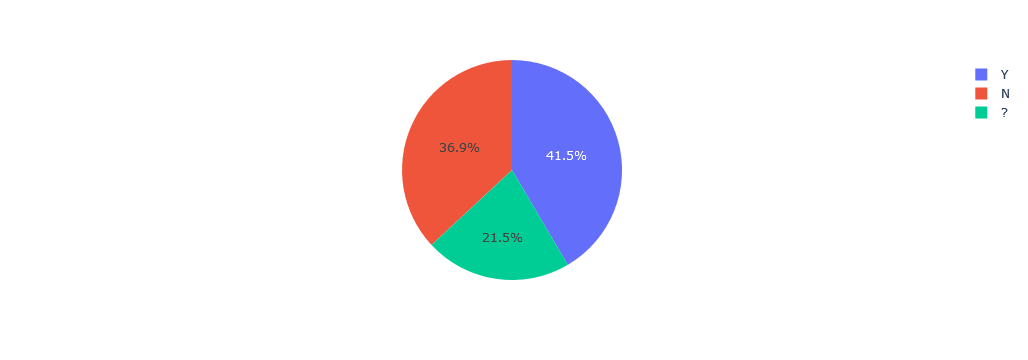

In [18]:
sig_df_2 = sig_df.reset_index()
fig = px.pie(sig_df_2, values='count', names='Studied_In_Groups')
fig.show()

## Challenge 3

Use `matplotlib` to plot the grades Student_score as a bar. There should be a bar for each student score.

HINT: `help(exam_df.plot.bar)` for assistance.

<Axes: >

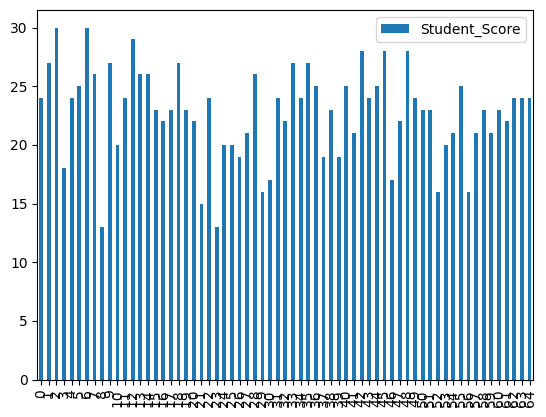

In [21]:
exam_df.plot.bar(y="Student_Score")

## Challenge 4

Since the last plot was too detailed, use `matplotlib` to plot a histogram of the grades in 9 bins. 

HINT: `help(exam_df.hist)` for assistance.

array([[<Axes: title={'center': 'Student_Score'}>]], dtype=object)

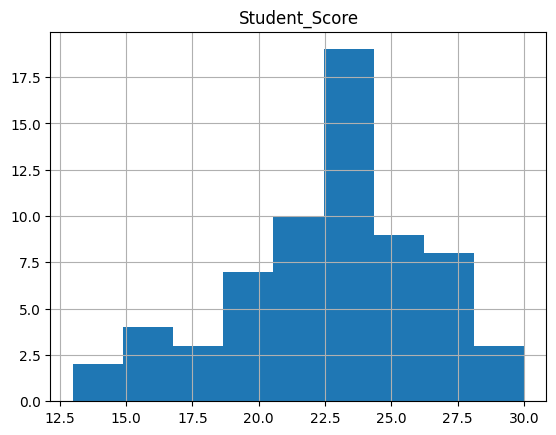

In [24]:
exam_df.hist(column=["Student_Score"], bins=9)

## Challenge 5

Plot the exact same histogram using plotly express. 

HINT: `help(px.histogram)` for assistance. 

Note (binning algorithm is different)


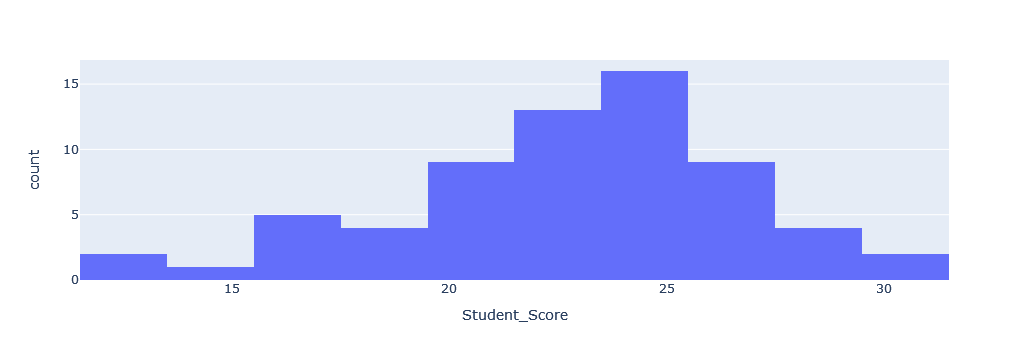

In [25]:
px.histogram(exam_df, x="Student_Score", nbins=9)

## Challenge 6

Plot a scatter comparing the completion time the exam to the exam score. use `matplotlib`

Note: No correlation will stick out.

<Axes: xlabel='Completion_Time', ylabel='Student_Score'>

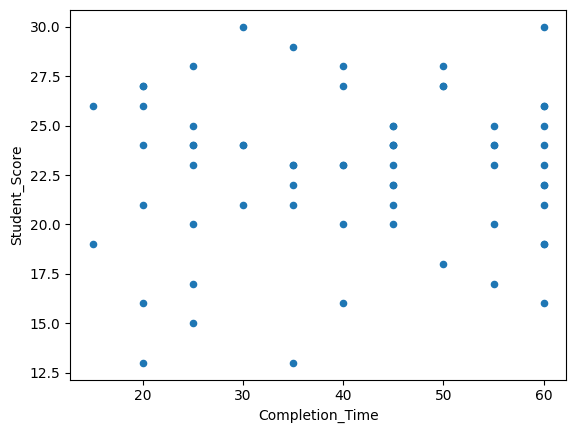

In [30]:
exam_df.plot.scatter(x="Completion_Time", y="Student_Score")

## Challenge 7

Plot the same scatter in `plotly express`


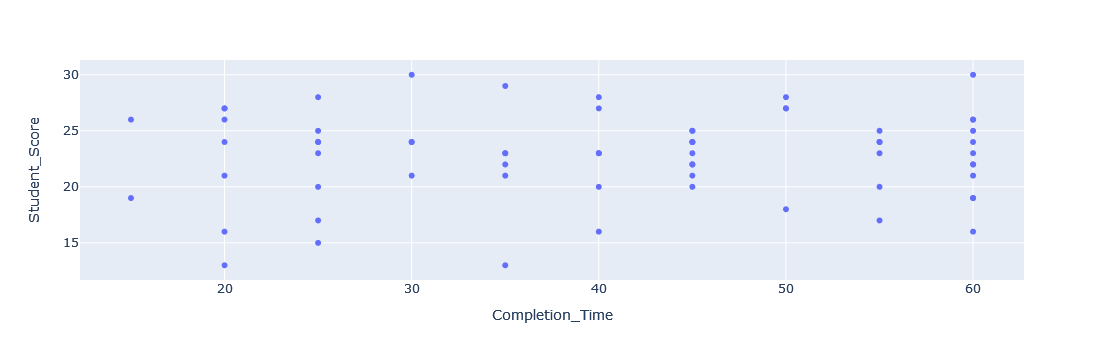

In [31]:
px.scatter(exam_df, x="Completion_Time", y="Student_Score")

# Weather API Dataset

Load the data 

In [33]:
location = 'Syracuse, NY'
weather = getWeather(weather_key,location)
weather_df = pd.json_normalize(weather['daily'])
display(weather_df.sample(3))

,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,...,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,rain
5,1702310400,1702297554,1702330190,1702292880,1702325520,0.96,1011,84,30.72,18.16,...,32.50,37.71,32.50,35.19,37.71,25.75,23.63,25.90,30.38,10.63
2,1702051200,1702038195,1702070991,1702021140,1702061460,0.86,1018,84,35.04,6.62,...,31.98,44.11,42.28,39.38,32.29,36.37,38.43,34.99,28.74,NaN
3,1702137600,1702124650,1702157389,1702111560,1702149120,0.89,1020,77,38.26,10.38,...,42.58,48.96,48.96,48.27,43.16,42.75,44.62,44.56,40.05,NaN


## Challenge 7

Plot a line of daily day temperatures (temp.day) using `matplotlib`

<Axes: >

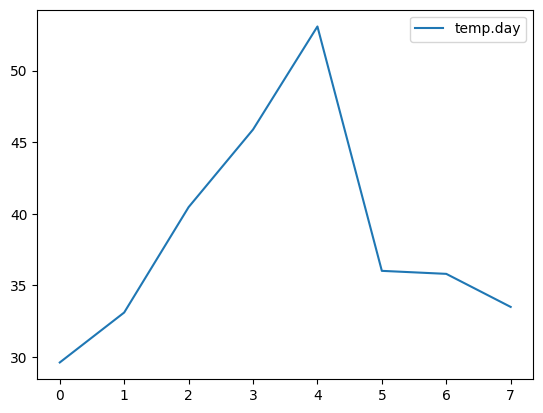

In [34]:
weather_df.plot.line(y='temp.day')

## Challenge 8

Plot the same line in `plotly express`

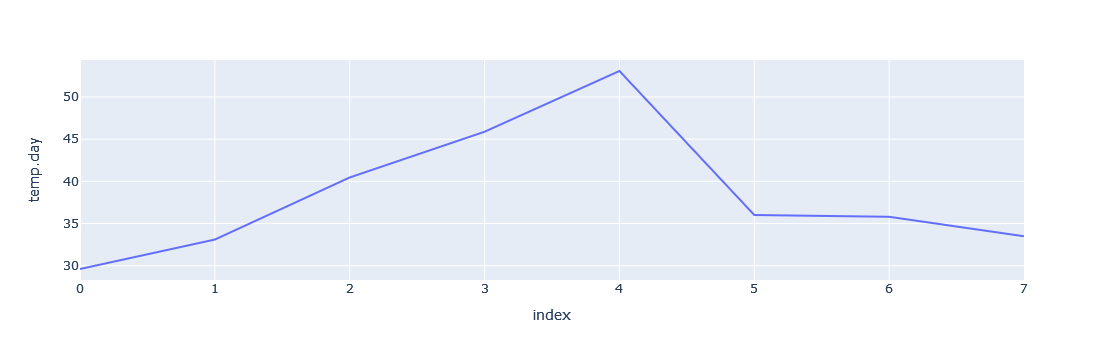

In [35]:
px.line(weather_df, y="temp.day")

## Challenge 9 

Let's plot multiple series

Using `matplotlib` plot two series `temp.min` and `temp.max` (both as lines) on the same graph.

HINT: 

 - This is not a one-liner. you must call in the `plt.plot()` method manually, then `display(plt)`
 - Consult the WMC1 example.

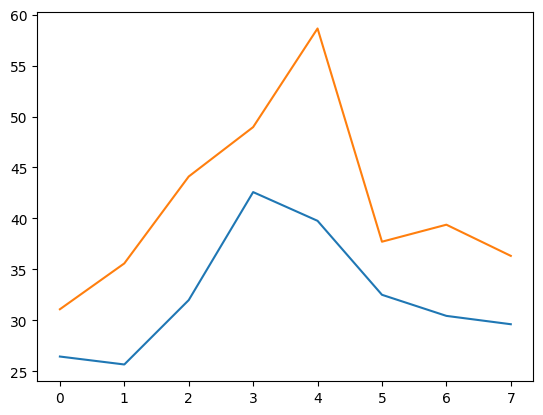

In [36]:
plt.plot(weather_df.index, weather_df['temp.min'])
plt.plot(weather_df.index, weather_df['temp.max'])
plt.show()

## Challenge 10

Plot the same thing using PoP (plain old plotly), similar to the lab example.

HINT: 

 - This is not a one-liner. you must make a figure and `add_trace()` for each series. 
 - Consult the lab. 

/home/jovyan/.local/lib/python3.11/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




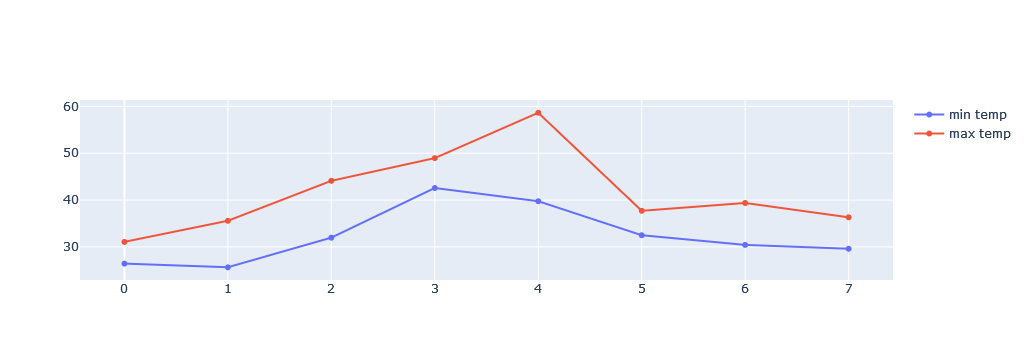

In [37]:
figure = go.Figure()
figure.add_trace(go.Line(x=weather_df.index, y=weather_df['temp.min'], name="min temp"))
figure.add_trace(go.Line(x=weather_df.index, y=weather_df['temp.max'], name="max temp"))
figure.show()

## Challenge 12

Create a `folium` map at the geographic center of NY State and place a pin there. The pin should day "This is the center"


HINT: 

 - Get the center here: https://en.wikipedia.org/wiki/List_of_geographic_centers_of_the_United_States
 - Use `folium.Marker` to make the pin, then add to map
 

In [43]:
center  = (42.9538, -75.5268)
ny_map = folium.Map(location=center)
marker_ny = folium.Marker(location=center, popup="this is the center of ny state")
ny_map.add_child(marker_ny)

# Cities of New York Dataset

Get it with this code

In [67]:
cities_df = pd.read_csv('https://raw.githubusercontent.com/mafudge/datasets/master/ist256/13-visualization/ny-cities.csv')
cities_df.sample(5)

,location,lat,lng
31,New Rochelle city,40.92,-73.78
61,Yonkers city,40.95,-73.87
6,Buffalo city,42.89,-78.86
41,Oswego city,43.46,-76.5
54,Syracuse city,43.04,-76.14


In [69]:
cities_df = cities_df.drop(62, axis=0)

In [70]:
city = "Buffalo city"
selected_city = cities_df[ cities_df['location']==city ]
print(selected_city['lat'].values[0], selected_city['lng'].values[0])

def get_city_coordinates(city, cities_df):
    selected_city = cities_df[ cities_df['location']==city ]
    return selected_city['lat'].values[0], selected_city['lng'].values[0]

get_city_coordinates("Albany city",cities_df)

42.89 -78.86


(42.67, '-73.8')

## Challenge 13

Create a `folium` map at the geographic center of NY State and place a pin there. put a red pin on the map for each city in the `cities_df` dataset.


HINT: 

 - Loop over each row in the data frame.
 - create the  `folium.Marker` then add to map
 

In [73]:
center  = (42.9538, -75.5268)
ny_map = folium.Map(location=center)
marker_ny = folium.Marker(location=center, popup="this is the center of ny state")
ny_map.add_child(marker_ny)

for city in cities_df['location']:
    latlng = get_city_coordinates(city, cities_df)
    city_marker = folium.CircleMarker(location=latlng, popup=city, color="red")
    ny_map.add_child(city_marker)
    
display(ny_map)

In [71]:
from ipywidgets import interact

cities = list(cities_df['location'].values)
@interact(city=cities)
def onselect(city):
    lat, lng = get_city_coordinates(city, cities_df)
    nymap = folium.Map(location=(lat,lng),zoom_start=10 )
    search = f"<a href='https://en.wikipedia.org/w/index.php?search={city}'>{city}<a>"
    pin = folium.Marker(location=(lat,lng),tooltip=city, popup=search)
    nymap.add_child(pin)
    display(nymap)

interactive(children=(Dropdown(description='city', options=('Albany city', 'Amsterdam city', 'Auburn city', 'B…

In [74]:
# run this code to turn in your work!
from coursetools.submission import Submission
Submission().submit_now()

Output()